# Heart Disease Prediction Project

-> Data -> Data Pre-Processing -> Data Analysis -> Training and Testing -> Model(Logistic Regression) -> Trained Model -> New Data -> Prediction of New Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
#### importing the dataset with the help of pandas library

heart_data=pd.read_csv('heart_disease_data.csv')

In [3]:
#### Printing the first 5 rows of the dataset
#### 1 represent Male and 0 represent Female in the SEX column
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#### Printing the last 5 rows of the dataset

heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#### this line of code will group all the column with respect to 'target' column and give the mean value

heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [9]:
heart_data['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [10]:
#### 1 represent the number of the men in the dataset
#### 0 represent the number of the women in the dataset

heart_data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#### 1 represent the person is unhealthy
#### 0 represent the person is healthy

heart_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## Visualization Representation 

Text(4.944444444444445, 0.5, 'Count')

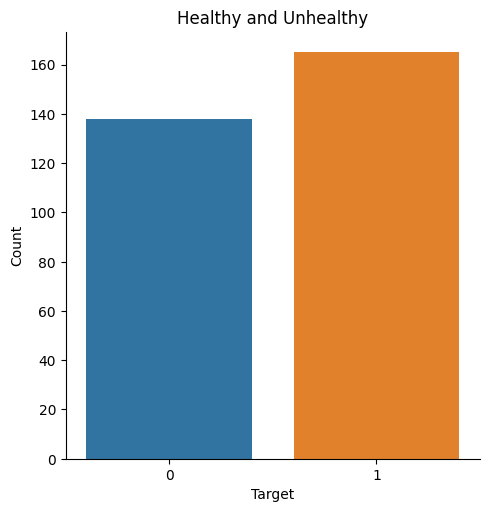

In [13]:
sns.catplot(heart_data,x='target',kind='count')
plt.title('Healthy and Unhealthy')
plt.xlabel('Target')
plt.ylabel('Count')

<AxesSubplot: xlabel='target', ylabel='age'>

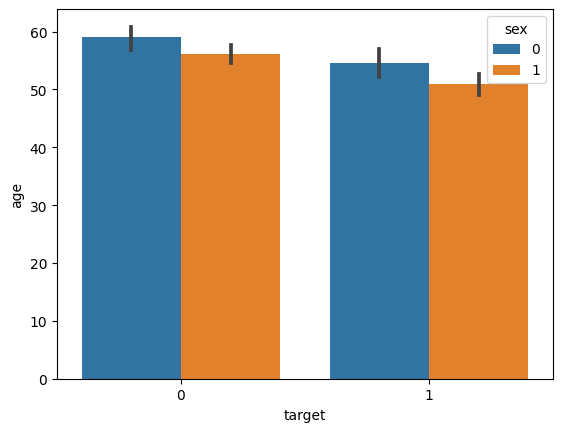

In [15]:
#### this graph is between Result and Age

sns.barplot(heart_data,x='target',y='age',hue='sex')
plt.title("Age vs Result")
plt.xlabel('Result')
plt.ylabel('Age')

#### Correlation 

In [16]:
corr=heart_data.corr()

#### Heatmap

<AxesSubplot: >

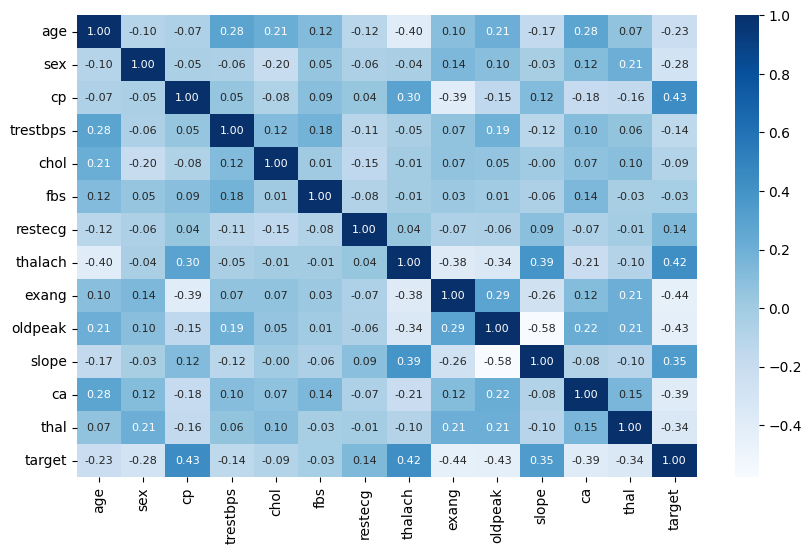

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,fmt='0.2f',annot=True,annot_kws={'size':8},cmap='Blues')

## Splitting the data into Dependent  and Non-Dependent Variables

In [26]:
X=heart_data.iloc[:,:-1]
Y=heart_data.iloc[:,-1]

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

## Splitting the Data into Testing and Training

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

In [30]:
print(X.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model

In [31]:
logistic_model=LogisticRegression()

## Training the Model

In [32]:
logistic_model.fit(X_train,Y_train)

C:\Users\Nishant Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

- Training Prediction

In [35]:
X_train_prediction=logistic_model.predict(X_train)
X_train_accuracy=metrics.accuracy_score(X_train_prediction,Y_train)
X_train_accuracy

<IPython.core.display.Javascript object>

0.8512396694214877

- Testing Prediction

In [36]:
X_test_prediction=logistic_model.predict(X_test)
X_test_accuracy=metrics.accuracy_score(X_test_prediction,Y_test)
X_test_accuracy

<IPython.core.display.Javascript object>

0.819672131147541

## Prediction System

In [44]:
input_data=(38,1,2,138,175,0,1,173,0,0,2,4,2)

input_data_asarray=np.asarray(input_data)

input_data_reshape=input_data_asarray.reshape(1,-1)

input_data_prediction=logistic_model.predict(input_data_reshape)

print(input_data_prediction)

if input_data_prediction == 1:
    print("Unhealthy")
else:
    print("Healthy")

[1]
Unhealthy


C:\Users\Nishant Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
